In [2]:
import os

# Data handling and manipulation library
import pandas as pd

# Library for numerical operations in Python
import numpy as np

In [3]:
#brick_data_dir = 'Market Data-20240909'
data_dir = 'Market Data - Municipality Level-20240909'


andel = pd.read_csv(os.path.join(data_dir,'andel_blodprop_i_hjertet.csv'), sep=';',encoding='iso-8859-1')
andel.rename(columns={'Andel med blodprop i hjertet': 'blood clot in heart'}, inplace=True)

fravaer = pd.read_csv(os.path.join(data_dir, 'fravaer.csv'), sep=';',encoding='iso-8859-1')
fravaer.rename(columns={'fravær': 'absence'}, inplace=True)
fravaer.head()

life_expectancy = pd.read_csv(os.path.join(data_dir, 'life_expectancy.csv'), sep=';',encoding='iso-8859-1')
life_expectancy.rename(columns={'år': 'life_expectancy_years'}, inplace=True)
life_expectancy = life_expectancy[['brick_nr','brick','life_expectancy_years']]

longterm_disease = pd.read_csv(os.path.join(data_dir, 'longterm_disease_.csv'), sep=';',encoding='iso-8859-1')
longterm_disease.rename(columns={'anddel': 'longterm_disease_andel'}, inplace=True)
longterm_disease = longterm_disease[['brick_nr','brick','longterm_disease_andel']]

svaert_overvaegt = pd.read_csv(os.path.join(data_dir, 'svaert_overvaegt.csv'), sep=';',encoding='iso-8859-1')
svaert_overvaegt.rename(columns={'Andel': 'overweight_andel'}, inplace=True)
svaert_overvaegt = svaert_overvaegt[['brick_nr','brick','overweight_andel']]

t2d = pd.read_csv(os.path.join(data_dir, 'T2D.csv'), sep=';',encoding='iso-8859-1')
t2d.rename(columns={'patients': 't2d_patients'}, inplace=True)
t2d = t2d[['brick_nr','brick','t2d_patients']]

uddannelse_lang = pd.read_csv(os.path.join(data_dir, 'uddannelse_lang.csv'), sep=';',encoding='iso-8859-1')
uddannelse_lang.rename(columns={'antal': 'uddannelse_lang_amount'}, inplace=True)
uddannelse_lang = uddannelse_lang[['brick_nr','brick','uddannelse_lang_amount']]

who_minimums_fysisk_aktivitet = pd.read_csv(os.path.join(data_dir, 'who_minimums_fysisk_aktivitet.csv'), sep=';',encoding='iso-8859-1')
who_minimums_fysisk_aktivitet.rename(columns={'Andel': 'physical_activity'}, inplace=True)

df = pd.concat([andel,fravaer,life_expectancy,longterm_disease,svaert_overvaegt,t2d,uddannelse_lang,who_minimums_fysisk_aktivitet], axis=1, ignore_index=False)
df = df.loc[:,~df.columns.duplicated()].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   brick_nr                60 non-null     int64 
 1   brick                   60 non-null     object
 2   blood clot in heart     60 non-null     object
 3   absence                 60 non-null     object
 4   life_expectancy_years   60 non-null     object
 5   longterm_disease_andel  60 non-null     object
 6   overweight_andel        60 non-null     object
 7   t2d_patients            60 non-null     object
 8   uddannelse_lang_amount  60 non-null     object
 9   physical_activity       60 non-null     object
dtypes: int64(1), object(9)
memory usage: 4.8+ KB


In [34]:
sales = pd.read_csv(os.path.join(data_dir, 'SALES.csv'), sep=',',encoding='iso-8859-1')
sales.rename(columns={'MUNICIPALITY': 'brick'}, inplace=True)

# replace with 'ø'
sales['brick'] = sales['brick'].apply(lambda x: x.replace('Ã¸','ø'))
# replace with 'æ'
sales['brick'] = sales['brick'].apply(lambda x: x.replace('Ã¦','æ'))
# replace with 'å'
sales['brick'] = sales['brick'].apply(lambda x: x.replace('Ã¥','å'))
sales #['brick'].values[-40:] #.replace('Ã¸','ø')  

,YEAR_MONTH,SECTOR_CODE,VOLUME,VALUE,WHO_ATC_CODE,brick
0,202008,P,2,1910.00,A10BD20,Allerød
1,202008,P,5,1562.70,A10AE04,Hillerød
2,202008,P,-1,-737.87,A10BJ01,Haderslev
3,202008,P,1,347.86,A10BK03,Dragør
4,202008,P,75,50091.00,A10BJ06,Høje-Taastrup
...,...,...,...,...,...,...
223668,202012,P,52,702.00,A10BA02,Guldborgsund
223669,202012,P,2,439.82,A10BD13,Ringkøbing-Skjern
223670,202012,P,23,10632.75,A10AE06,Frederiksberg
223671,202012,P,5,1696.00,A10AE04,Næstved


In [ ]:
# List of DataFrames
dfs = [andel,fravaer,life_expectancy,longterm_disease,svaert_overvaegt,t2d,uddannelse_lang,who_minimums_fysisk_aktivitet]#,sales]


combined_df = dfs[0]
for i, df in enumerate(dfs[1:], start=1):
    combined_df = pd.merge(combined_df, df, on=['brick'], how='outer', suffixes=('', f'_df{i+1}'))
columns_to_drop = ['brick_nr_df2', 'brick_nr_df3','brick_nr_df4','brick_nr_df5','brick_nr_df6','brick_nr_df7','brick_nr_df8']

# Drop the specified columns
df = combined_df.drop(columns=columns_to_drop)
df

## Data cleaning and preprocessing
In the first part of this notebook, the focus will be on preparing and cleaning the data for subsequent analysis. This is an example dataset, and does not provide a full picture of all the datasets.

#### 1. Get an overview
We will first investigate the dataframe and look at the value frequency of each column.

This can be used for understanding which column provide enough date to be relevant. Or the correct data type.

Understanding which columns need to be dropped.

In [14]:
df.isna().sum(), sales.isna().sum()

(brick_nr                  0
 brick                     0
 blood clot in heart       0
 absence                   0
 life_expectancy_years     0
 longterm_disease_andel    0
 overweight_andel          0
 t2d_patients              0
 uddannelse_lang_amount    0
 physical_activity         0
 dtype: int64,
 YEAR_MONTH      0
 SECTOR_CODE     0
 VOLUME          0
 VALUE           0
 WHO_ATC_CODE    0
 brick           0
 dtype: int64)

In [ ]:
#To get a sense of which features offer meaningful information, we print out the frequency of each
#value for each feature
cols_to_drop = []

Nrows = df.shape[0]
# Go through each column except for the ones we want to drop
for col in df.columns.drop(cols_to_drop):
    # get unique values in column
    unique = df[col].unique();
    print("\n", col,":")
    # calculate frequency of each value
    for val in unique:
        if val not in ['nan']:
            N = len(df[df[col] == val])
            print("Value, N observations, frequency :", val," ,", N, " ,", np.round(N/Nrows,3))

    print("No. of NANs ", len(df[df[col].isna()]))

OBS they might not need to be droped. Maybe one of the dataframes spell the brick differently, affecting the merge.

#### 2. Convert features with potential to be numeric into numeric features
from the investigation of the features we can see that a number of features can be converted from object data types into integers or floats.

In [66]:
df = df.apply(lambda x: x.replace(',', '.', regex=True))
to_numeric = [
    'blood clot in heart', 
    'absence', 
    'life_expectancy_years', 
    'longterm_disease_andel',
    'overweight_andel',
    't2d_patients',
    'uddannelse_lang_amount',
    'physical_activity'
]

df[to_numeric] = df[to_numeric].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   brick_nr                60 non-null     int64  
 1   brick                   60 non-null     object 
 2   blood clot in heart     60 non-null     float64
 3   absence                 60 non-null     float64
 4   life_expectancy_years   60 non-null     float64
 5   longterm_disease_andel  60 non-null     float64
 6   overweight_andel        60 non-null     float64
 7   t2d_patients            60 non-null     float64
 8   uddannelse_lang_amount  60 non-null     float64
 9   physical_activity       60 non-null     float64
dtypes: float64(8), int64(1), object(1)
memory usage: 4.8+ KB


Another interesting column is the column of YEAR_MONTH.

Looking at the column we can see that it combines both year and month into one as a float. Possible in the future it might be interesting to look at each year or each month. So lets split it and make it into two columns; one for year and one for month

In [35]:
# We start by making the column into a string to make it easier to slice
sales['YEAR_MONTH'] = sales['YEAR_MONTH'].astype(str)

# We then slice the year from the first 4 digits
sales['year'] = sales['YEAR_MONTH'].str[:4]  
# We then slice the year from the 4th digit to the 6th digit
sales['month'] = sales['YEAR_MONTH'].str[4:6]
sales

,YEAR_MONTH,SECTOR_CODE,VOLUME,VALUE,WHO_ATC_CODE,brick,year,month
0,202008,P,2,1910.00,A10BD20,Allerød,2020,08
1,202008,P,5,1562.70,A10AE04,Hillerød,2020,08
2,202008,P,-1,-737.87,A10BJ01,Haderslev,2020,08
3,202008,P,1,347.86,A10BK03,Dragør,2020,08
4,202008,P,75,50091.00,A10BJ06,Høje-Taastrup,2020,08
...,...,...,...,...,...,...,...,...
223668,202012,P,52,702.00,A10BA02,Guldborgsund,2020,12
223669,202012,P,2,439.82,A10BD13,Ringkøbing-Skjern,2020,12
223670,202012,P,23,10632.75,A10AE06,Frederiksberg,2020,12
223671,202012,P,5,1696.00,A10AE04,Næstved,2020,12


#### 3. Another way to handle missing values
if we go back to the dataset from before we dropped nan values.

Here we can see that there are a number of missing values

In [ ]:
# Let's look at the number of Nans for each numeric column
cols = df.select_dtypes(include=['float64', 'int64','object']).columns

Nrows = df.shape[0]
# Go through each column except for the ones we want to drop
for col in cols:
    # get unique values in column
    unique = df[col].unique();
    print(col,":")
    print("No. of NANs ", len(df[df[col].isna()]))



Here we see that there are a number of missing values. Some of these can be handled through the merging between the dataframe SALES.csv and others.

Because of this we are not gonna focus on those values. But what about 'volume' and 'value'. Both columns are from the SALES dataset and are both contain float values. As such we are able to use a imputer to fill the missing value.

This method allows us to make a predictive model that predicts the missing values.

In [ ]:
# Imputation functions
from sklearn.impute import KNNImputer, SimpleImputer

num_cols = ['VOLUME','VALUE']
# Too impute missing values, we introduce the following functions

# This imputer only simply replace the missing values with mean, median or most frequent value of that feature
simple_imputer = SimpleImputer(missing_values=np.nan, strategy='mean') 

# This imputer considers all numeric features and assigns to each missing value the feature mean of the n nearest neighbors
knn_imputer = KNNImputer(missing_values = np.nan, n_neighbors = 5)

# We will use the knn imputer, since it considers all numeric features to find the most similar neighbors:
df.loc[:, num_cols] = knn_imputer.fit_transform(df.loc[:, num_cols] )
df

Here an example is shown that a prediction is made of "16.63" for VOLUME, and "4946.722" for VALUE

#### 4. Convert categorical features to numeric ones
- Convert features with two values to boolean features
- Label encode features with order
- One hot encoding

In our dataset we have the column SECTOR_CODE with *P* and *S*
this represent XXX.


In [ ]:
# First we describe the numeric representation
sector_code_rep = {'P': 0, 'S': 1}
sales['SECTOR_CODE'] = sales['SECTOR_CODE'].map(sector_code_rep).astype(int)


In [69]:
# save the data
output_dir = 'data_processed'
df.to_csv(os.path.join(output_dir, 'data_processhealth_data_cleaneed.csv'), index=False)
sales.to_csv(os.path.join(output_dir, 'sales_cleaned.csv'), index=False)

If we wish to utilise this function for predictive modelling then we would have to change it into a numeric representation.
As there are only two different values it would be perfect to convert it into a boolean (0,1)

#### Ranking ordered features (ordinal features) using label encoding:

Since one-hot encoding can increase the no. of features dramatically,
we will show another method of changing categorical features into numeric - LabelEncoding. Import to note here is that if we just use LabelEncoding then the categorical feature will be label in order of frequency. However, when we utilise this feature for training machine learning models, it will count the ones with higher values as being more important. This is not necessarily the truth. We wish for a way so that the order of numbers is representative. Thus we need to make an order to base our labeling on. Sometimes, the order is very clear (e.g. low, mid, high, very high), and sometimes we have to be
a bit creative.


In the following, we'll convert the brick and brick_nr by finding a metric for the order and then using label encoding. Looking at the dataframe there are many different features that could be the basis for creating the order. Just as an example we will use the number of type 2 diabetes (t2d_patients)

In [77]:
sales

,YEAR_MONTH,SECTOR_CODE,VOLUME,VALUE,WHO_ATC_CODE,brick,year,month
0,202008,0,2,1910.00,A10BD20,Allerød,2020,08
1,202008,0,5,1562.70,A10AE04,Hillerød,2020,08
2,202008,0,-1,-737.87,A10BJ01,Haderslev,2020,08
3,202008,0,1,347.86,A10BK03,Dragør,2020,08
4,202008,0,75,50091.00,A10BJ06,Høje-Taastrup,2020,08
...,...,...,...,...,...,...,...,...
223668,202012,0,52,702.00,A10BA02,Guldborgsund,2020,12
223669,202012,0,2,439.82,A10BD13,Ringkøbing-Skjern,2020,12
223670,202012,0,23,10632.75,A10AE06,Frederiksberg,2020,12
223671,202012,0,5,1696.00,A10AE04,Næstved,2020,12


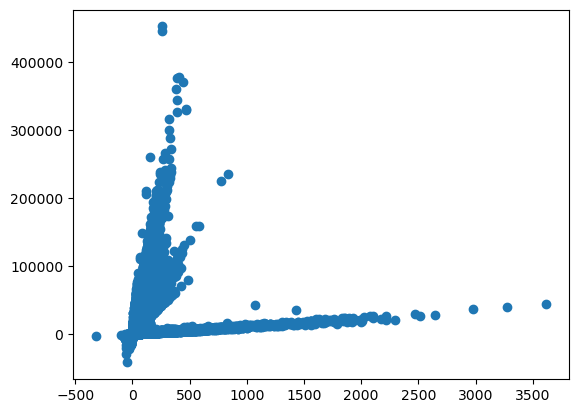

In [76]:
import matplotlib.pyplot as plt
vol = sales['VOLUME'].values
val = sales['VALUE'].values
plt.scatter(vol, val)


In [28]:
from sklearn.preprocessing import LabelEncoder

# Sort the DataFrame based on column_y to define the order
encoded_df = df_dropped.sort_values(by='longterm_disease_andel')

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder on the sorted column_x and transform it
encoded_df['brick'] = label_encoder.fit_transform(encoded_df['brick'])

df_dropped['brick'] = encoded_df.set_index(df_dropped.index)['brick']
df_dropped

C:\Users\nped\AppData\Local\Temp\ipykernel_24712\1564712222.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['brick'] = encoded_df.set_index(df_dropped.index)['brick']


,brick_nr,brick,blood clot in heart,absence,life_expectancy_years,longterm_disease_andel,overweight_andel,t2d_patients,uddannelse_lang_amount,physical_activity,YEAR_MONTH,SECTOR_CODE,VOLUME,VALUE,WHO_ATC_CODE,year,month
0,308.0,5,0.013750,6.002000,80.925500,0.358000,0.206333,3936.207344,11845.819974,"0,33866666666666667",202009.0,0,-1.0,-603.65,A10BH01,2020,09
1,308.0,5,0.013750,6.002000,80.925500,0.358000,0.206333,3936.207344,11845.819974,"0,33866666666666667",202008.0,0,1.0,238.08,A10AC01,2020,08
2,308.0,5,0.013750,6.002000,80.925500,0.358000,0.206333,3936.207344,11845.819974,"0,33866666666666667",202008.0,0,10.0,4894.70,A10AE06,2020,08
3,308.0,5,0.013750,6.002000,80.925500,0.358000,0.206333,3936.207344,11845.819974,"0,33866666666666667",202008.0,0,3.0,891.87,A10AD01,2020,08
4,308.0,5,0.013750,6.002000,80.925500,0.358000,0.206333,3936.207344,11845.819974,"0,33866666666666667",202009.0,0,25.0,6907.75,A10AC01,2020,09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222790,207.0,17,0.013833,6.345222,79.865444,0.379111,0.231143,3873.451601,12043.591696,"0,334",202007.0,0,4.0,1266.88,A10BK03,2020,07
222791,207.0,17,0.013833,6.345222,79.865444,0.379111,0.231143,3873.451601,12043.591696,"0,334",202007.0,0,0.0,-53.38,A10BD08,2020,07
222792,207.0,17,0.013833,6.345222,79.865444,0.379111,0.231143,3873.451601,12043.591696,"0,334",202009.0,0,391.0,4301.00,A10BA02,2020,09
222793,207.0,17,0.013833,6.345222,79.865444,0.379111,0.231143,3873.451601,12043.591696,"0,334",202010.0,0,1.0,278.88,A10BD08,2020,10


#### One-hot encoding

One-hot encoding has the advantage that is does not introduce any order between features like label encoding does, but the drawback that K different categories of a feature will be transformed into K or K-1 new features, and so the total number of features can become very large, which can hurt performance. For this reasons, if a feature has many categories, these categories are often grouped in straightforward (simply group rare categories) or clever (use domain knowledge to make groups)

We will one-hot encode the column 'WHO_ATC_CODE'
ATC: The Anatomical Therapeutic Chemical code - a code assigned to medicine based on it organic structure and/or system

In [30]:
## We need this function to do one-hot (or dummy) encoding
def do_dummy_encoding(dataframe, target_columns, prefix_list, drop_first = False):
    """
    For each cateogrical column with categories (l1,...,ln), this function transform the category into n ( if drop_first = False)
    or n-1 columns, where [0,0,...,0] represents l1,
    [1,0,...,0] rep. l2, [0,1,0,...,0] rep l3 etc
    """
    data = dataframe.copy()
    # Build dummy index dataframe
    dummy_columns = pd.get_dummies(data[target_columns], prefix = prefix_list, drop_first=drop_first)

    ## Append new columns to dataframe
    data = pd.concat([data, dummy_columns], axis = 1)

    ## Drop original columns
    data.drop(columns = target_columns, inplace=True)
    return data

In [31]:
onehot_cols = ['WHO_ATC_CODE']

for i, col in enumerate(onehot_cols):
    # Use onehot_cols[i] as prefix for the new columns
    # If drop_first = False, the first category will be included in the new columns
    # If drop_first = True, the first category will be dropped, meaning that
    #  if all new columns are 0, the category is the first one. This is the most
    #  efficient way of doing it, but it has the price that we have to remember that
    # the first category is represented like this
    df_dropped = do_dummy_encoding(df_dropped, col, onehot_cols[i], drop_first = False)


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223701 entries, 0 to 223700
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   brick_nr                76127 non-null   float64
 1   brick                   223701 non-null  object 
 2   blood clot in heart     76127 non-null   object 
 3   absence                 76127 non-null   object 
 4   life_expectancy_years   76127 non-null   object 
 5   longterm_disease_andel  76127 non-null   object 
 6   overweight_andel        76127 non-null   object 
 7   t2d_patients            76127 non-null   object 
 8   uddannelse_lang_amount  76127 non-null   object 
 9   physical_activity       76127 non-null   object 
 10  YEAR_MONTH              223673 non-null  float64
 11  SECTOR_CODE             223673 non-null  object 
 12  VOLUME                  223701 non-null  float64
 13  VALUE                   223701 non-null  float64
 14  WHO_ATC_CODE        

In [35]:
df_dropped

,brick_nr,brick,blood clot in heart,absence,life_expectancy_years,longterm_disease_andel,overweight_andel,t2d_patients,uddannelse_lang_amount,physical_activity,...,WHO_ATC_CODE_A10BJ01,WHO_ATC_CODE_A10BJ02,WHO_ATC_CODE_A10BJ03,WHO_ATC_CODE_A10BJ05,WHO_ATC_CODE_A10BJ06,WHO_ATC_CODE_A10BK01,WHO_ATC_CODE_A10BK02,WHO_ATC_CODE_A10BK03,WHO_ATC_CODE_A10BK04,WHO_ATC_CODE_A10BX02
0,308.0,5,0.013750,6.002000,80.925500,0.358000,0.206333,3936.207344,11845.819974,"0,33866666666666667",...,False,False,False,False,False,False,False,False,False,False
1,308.0,5,0.013750,6.002000,80.925500,0.358000,0.206333,3936.207344,11845.819974,"0,33866666666666667",...,False,False,False,False,False,False,False,False,False,False
2,308.0,5,0.013750,6.002000,80.925500,0.358000,0.206333,3936.207344,11845.819974,"0,33866666666666667",...,False,False,False,False,False,False,False,False,False,False
3,308.0,5,0.013750,6.002000,80.925500,0.358000,0.206333,3936.207344,11845.819974,"0,33866666666666667",...,False,False,False,False,False,False,False,False,False,False
4,308.0,5,0.013750,6.002000,80.925500,0.358000,0.206333,3936.207344,11845.819974,"0,33866666666666667",...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222790,207.0,17,0.013833,6.345222,79.865444,0.379111,0.231143,3873.451601,12043.591696,"0,334",...,False,False,False,False,False,False,False,True,False,False
222791,207.0,17,0.013833,6.345222,79.865444,0.379111,0.231143,3873.451601,12043.591696,"0,334",...,False,False,False,False,False,False,False,False,False,False
222792,207.0,17,0.013833,6.345222,79.865444,0.379111,0.231143,3873.451601,12043.591696,"0,334",...,False,False,False,False,False,False,False,False,False,False
222793,207.0,17,0.013833,6.345222,79.865444,0.379111,0.231143,3873.451601,12043.591696,"0,334",...,False,False,False,False,False,False,False,False,False,False
